C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\1055956194.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour_of_Day"] = pd.to_datetime(data["Transaction_Time"]).dt.hour


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('../data/transaction_detail.csv')

# Convert Transaction_Date and Transaction_Time to datetime
data["Transaction_Date"] = pd.to_datetime(data["Transaction_Date"])
data["Day_of_Week"] = data["Transaction_Date"].dt.dayofweek
data["Hour_of_Day"] = pd.to_datetime(data["Transaction_Time"]).dt.hour

# Convert categorical variables into numerical representations using Label Encoding
label_encoder = LabelEncoder()

object_columns = data.select_dtypes(include='object').columns
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convert date and time columns to numeric format
data["Transaction_Date"] = data["Transaction_Date"].dt.strftime("%Y%m%d").astype(int)
data["Transaction_Time"] = pd.to_datetime(data["Transaction_Time"]).dt.strftime("%H%M%S").astype(int)

# Split the dataset into features (X) and target variable (y)
X = data.drop("Fraud_Label", axis=1)  # Exclude only the target variable
y = data["Fraud_Label"]

# Apply SMOTE for class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\4035556915.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour_of_Day"] = pd.to_datetime(data["Transaction_Time"]).dt.hour


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def encode_input(input_data, label_encoder):
    encoded_data = input_data.copy()

    # Define encoding mappings if needed
    payment_method_mapping = {'Credit Card': 0, 'UPI': 1, 'Other': 2}
    location_mapping = {'New York': 0, 'Mumbai': 1, 'Chennai': 2, 'Pune': 3, 'Other': 4}

    # Encode Payment_Method
    encoded_data['Payment_Method'] = payment_method_mapping.get(encoded_data['Payment_Method'], -1)

    # Encode Billing_Location and Shipping_Location
    encoded_data['Billing_Location'] = location_mapping.get(encoded_data['Billing_Location'], -1)
    encoded_data['Shipping_Location'] = location_mapping.get(encoded_data['Shipping_Location'], -1)

    # Convert Session_Duration and Time_Between_Transactions to integers
    encoded_data['Session_Duration'] = int(encoded_data['Session_Duration'].split()[0])
    encoded_data['Time_Between_Transactions'] = int(encoded_data['Time_Between_Transactions'].split()[0])

    # Convert datetime columns
    encoded_data['Transaction_Date'] = datetime.strptime(encoded_data['Transaction_Date'], '%Y-%m-%d').strftime("%Y%m%d")
    encoded_data['Transaction_Time'] = datetime.strptime(encoded_data['Transaction_Time'], '%H:%M:%S').strftime("%H%M%S")

    return encoded_data




def predict_fraud(input_data, model, label_encoder):
    # Preprocess input_data
    encoded_input = encode_input(input_data, label_encoder)

    # Select only relevant columns for prediction
    X = encoded_input.drop(["Transaction_ID", "Account_Creation_Date"], axis=1)

    # Make prediction
    prediction = model.predict([X.values.flatten()])

    return prediction[0]

# Load your dataset
data = pd.read_csv('../data/transaction_detail.csv')

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Convert Transaction_Date and Transaction_Time to datetime
data["Transaction_Date"] = pd.to_datetime(data["Transaction_Date"])
data["Day_of_Week"] = data["Transaction_Date"].dt.dayofweek
data["Hour_of_Day"] = pd.to_datetime(data["Transaction_Time"]).dt.hour

# Convert categorical variables into numerical representations using Label Encoding
label_encoder = LabelEncoder()
object_columns = data.select_dtypes(include='object').columns
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convert date and time columns to numeric format
data["Transaction_Date"] = data["Transaction_Date"].dt.strftime("%Y%m%d").astype(int)
data["Transaction_Time"] = pd.to_datetime(data["Transaction_Time"]).dt.strftime("%H%M%S").astype(int)

# Split the dataset into features (X) and target variable (y)
X = data.drop("Fraud_Label", axis=1)
y = data["Fraud_Label"]

# Apply SMOTE for class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train the model on the training set
xgb_model.fit(X_train, y_train)



C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\963172972.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour_of_Day"] = pd.to_datetime(data["Transaction_Time"]).dt.hour


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Confusion Matrix of XGBoost: 
 [[ 6  0]
 [ 0 12]]


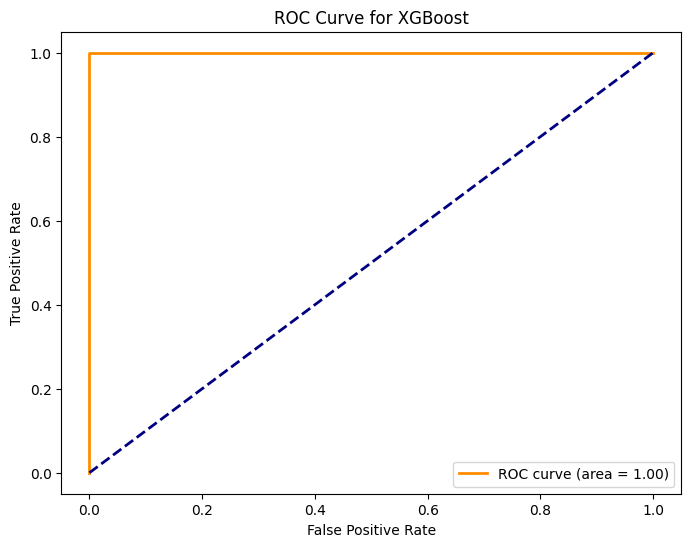

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming you have trained an XGBoost classifier named xgb_model

# Make predictions on the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Print Classification Report
print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


In [23]:
import pandas as pd

def encode_input(input_data, label_encoder):
    encoded_data = input_data.copy()

    # Drop unnecessary parameters
    encoded_data = encoded_data.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Account_Creation_Date'], errors='ignore')

    # Convert Transaction_Date and Transaction_Time to datetime
    encoded_data["Transaction_Date"] = pd.to_datetime(encoded_data["Transaction_Date"])
    encoded_data["Day_of_Week"] = encoded_data["Transaction_Date"].dt.dayofweek
    encoded_data["Hour_of_Day"] = pd.to_datetime(encoded_data["Transaction_Time"]).dt.hour

    # Convert categorical variables into numerical representations using Label Encoding
    object_columns = encoded_data.select_dtypes(include='object').columns
    for col in object_columns:
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

    # Convert date and time columns to numeric format
    encoded_data["Transaction_Date"] = encoded_data["Transaction_Date"].dt.strftime("%Y%m%d").astype(int)
    encoded_data["Transaction_Time"] = pd.to_datetime(encoded_data["Transaction_Time"]).dt.strftime("%H%M%S").astype(int)

    return encoded_data

def predict_fraud(input_data, model, label_encoder):
    # Preprocess input_data
    encoded_input = encode_input(pd.DataFrame([input_data]), label_encoder)

    # Make predictions
    prediction = model.predict(encoded_input.drop(['Transaction_ID', 'Fraud_Label'], axis=1))

    return prediction[0]

# Example usage:
new_input = {
    'Transaction_Amount': 1250,
    'User_Account_ID': 101,
    'Payment_Method': 'Credit Card',
    'Billing_Location': 'Mumbai',
    'Shipping_Location': 'Mumbai',
    'Device_IP_Address': '192.168.1.10',
    'Session_Duration': '600 seconds',
    'Frequency_of_Transactions': 5,
    'Time_Between_Transactions': '120 seconds',
    'Unusual_Time_of_Transaction': 0,
    'Unusual_Transaction_Amounts': 0,
    'IP_Address_History': '192.168.1.10',
    'Transaction_Date': '2023-05-10',
    'Transaction_Time': '18:30:00'
}

fraud_prediction = predict_fraud(new_input, xgb_model, label_encoder)
print(f"Fraud Prediction: {fraud_prediction}")


KeyError: "['Transaction_ID', 'Fraud_Label'] not found in axis"

In [25]:
import pandas as pd

def encode_input(input_data, label_encoder):
    encoded_data = input_data.copy()

    # Drop unnecessary parameters
    encoded_data = encoded_data.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Account_Creation_Date'], errors='ignore')

    # Convert Transaction_Date and Transaction_Time to datetime
    encoded_data["Transaction_Date"] = pd.to_datetime(encoded_data["Transaction_Date"])
    encoded_data["Day_of_Week"] = encoded_data["Transaction_Date"].dt.dayofweek
    encoded_data["Hour_of_Day"] = pd.to_datetime(encoded_data["Transaction_Time"]).dt.hour

    # Convert categorical variables into numerical representations using Label Encoding
    object_columns = encoded_data.select_dtypes(include='object').columns
    for col in object_columns:
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

    # Convert date and time columns to numeric format
    encoded_data["Transaction_Date"] = encoded_data["Transaction_Date"].dt.strftime("%Y%m%d").astype(int)
    encoded_data["Transaction_Time"] = pd.to_datetime(encoded_data["Transaction_Time"]).dt.strftime("%H%M%S").astype(int)

    return encoded_data

def predict_fraud(input_data, model, label_encoder):
    # Preprocess input_data
    encoded_input = encode_input(pd.DataFrame([input_data]), label_encoder)

    # Ensure the necessary columns are present
    required_columns = ['Transaction_Amount', 'User_Account_ID', 'Payment_Method', 'Billing_Location', 'Shipping_Location',
                         'Device_IP_Address', 'Session_Duration', 'Frequency_of_Transactions', 'Time_Between_Transactions',
                         'Unusual_Time_of_Transaction', 'Unusual_Transaction_Amounts', 'IP_Address_History']

    for col in required_columns:
        if col not in encoded_input.columns:
            encoded_input[col] = 0  # Default to 0 for missing columns

    # Make predictions
    prediction = model.predict(encoded_input[required_columns])

    return prediction[0]

# Example usage:
new_input = {
    'Transaction_Amount': 1250,
    'User_Account_ID': 101,
    'Payment_Method': 'Credit Card',
    'Billing_Location': 'Mumbai',
    'Shipping_Location': 'Mumbai',
    'Device_IP_Address': '192.168.1.10',
    'Session_Duration': '600 seconds',
    'Frequency_of_Transactions': 5,
    'Time_Between_Transactions': '120 seconds',
    'Unusual_Time_of_Transaction': 0,
    'Unusual_Transaction_Amounts': 0,
    'IP_Address_History': '192.168.1.10',
    'Transaction_Date': '2023-05-10',
    'Transaction_Time': '18:30:00'
}

fraud_prediction = predict_fraud(new_input, xgb_model, label_encoder)
print(f"Fraud Prediction: {fraud_prediction}")


ValueError: Feature shape mismatch, expected: 18, got 12

In [26]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '../data/transaction_detail.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Assuming 'Transaction_Date' and 'Transaction_Time' are in separate columns
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])
df = df.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time'], axis=1)

# Convert categorical variables into numerical representations
df = pd.get_dummies(df)

# Feature Engineering (if needed)

# Split the data into features (X) and target variable (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Use the model to predict fraud for new input data
# Assuming 'new_input' is a DataFrame with the same structure as the original data
new_input = pd.read_csv('path_to_new_input.csv')  # Replace 'path_to_new_input.csv' with the actual path
new_input['Transaction_DateTime'] = pd.to_datetime(new_input['Transaction_Date'] + ' ' + new_input['Transaction_Time'])
new_input = new_input.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time'], axis=1)
new_input = pd.get_dummies(new_input)

# Make predictions on the new input
fraud_prediction = model.predict(new_input)

print(f"Fraud Prediction: {fraud_prediction}")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Transaction_DateTime: datetime64[ns]

In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '../data/transaction_detail.csv'
df = pd.read_csv(file_path)

# Data Preprocessing
# Combine 'Transaction_Date' and 'Transaction_Time' into a single datetime column
df['Transaction_DateTime'] = pd.to_datetime(df['Transaction_Date'] + ' ' + df['Transaction_Time'])
df = df.drop(['Transaction_ID', 'Transaction_Date', 'Transaction_Time'], axis=1)

# Extract features from the datetime column
df['Transaction_Year'] = df['Transaction_DateTime'].dt.year
df['Transaction_Month'] = df['Transaction_DateTime'].dt.month
df['Transaction_Day'] = df['Transaction_DateTime'].dt.day
df['Transaction_Hour'] = df['Transaction_DateTime'].dt.hour
df['Transaction_Minute'] = df['Transaction_DateTime'].dt.minute

# Drop the original datetime column
df = df.drop(['Transaction_DateTime'], axis=1)

# Convert categorical variables into numerical representations
df = pd.get_dummies(df)

# Split the data into features (X) and target variable (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [36]:
new_input_data = {
    'Transaction_Amount': [1500],
    'User_Account_ID': [104],
    'Account_Creation_Date': ['2022-11-15'],
    'Payment_Method': ['Credit Card'],
    'Billing_Location': ['Bangalore'],
    'Shipping_Location': ['Hyderabad'],
    'Device_IP_Address': ['192.168.1.40'],
    'Session_Duration': ['500 seconds'],
    'Frequency_of_Transactions': [7],
    'Time_Between_Transactions': ['80 seconds'],
    'Unusual_Time_of_Transaction': [0],
    'Unusual_Transaction_Amounts': [0],
    'IP_Address_History': ['192.168.1.40']
}

# Create a DataFrame for new input
new_input = pd.DataFrame(new_input_data)

# Preprocess the new input data to match the training data columns
new_input['Account_Creation_Date'] = pd.to_datetime(new_input['Account_Creation_Date'])
new_input['Session_Duration'] = new_input['Session_Duration'].str.extract('(\d+)').astype(int)
new_input['Time_Between_Transactions'] = new_input['Time_Between_Transactions'].str.extract('(\d+)').astype(int)

# Convert categorical variables into numerical representations
new_input = pd.get_dummies(new_input)

# Make sure the columns in new_input match the columns in X_train
missing_cols = set(X_train.columns) - set(new_input.columns)
for col in missing_cols:
    new_input[col] = 0

# Make sure the columns in X_train match the columns in new_input
missing_cols = set(new_input.columns) - set(X_train.columns)
new_input = new_input[X_train.columns]

# Make predictions on the new input
fraud_prediction = model.predict(new_input)

print(f"Fraud Prediction: {fraud_prediction}")

C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\419798379.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input[col] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\419798379.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input[col] = 0
C:\Users\Yash\AppData\Local\Temp\ipykernel_7288\419798379.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

Fraud Prediction: [0]


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import pickle as pkl

def load_data(file_path):
    df = pd.read_csv("../data/transaction_detail.csv")
    return df

# Function for preprocessing input
def preprocess_input(input_data):
    # Create a DataFrame from the input data
    processed_input = pd.DataFrame(input_data)

    # Convert date columns to datetime objects
    date_columns = ['Account_Creation_Date', 'Transaction_Date']
    for col in date_columns:
        processed_input[col] = pd.to_datetime(processed_input[col], errors='coerce')

    # Extract additional features from datetime columns if needed
    processed_input['Transaction_Year'] = processed_input['Transaction_Date'].dt.year
    processed_input['Transaction_Month'] = processed_input['Transaction_Date'].dt.month
    processed_input['Transaction_Day'] = processed_input['Transaction_Date'].dt.day
    processed_input['Transaction_Hour'] = processed_input['Transaction_Date'].dt.hour
    processed_input['Transaction_Minute'] = processed_input['Transaction_Date'].dt.minute

    # Drop original datetime columns
    processed_input = processed_input.drop(date_columns, axis=1)

    # Perform one-hot encoding for categorical columns
    processed_input = pd.get_dummies(processed_input)

    return processed_input


def train_models(X_train, y_train):
    # XGBoost model
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Random Forest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Neural Network model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    model_nn = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    return xgb_model, rf_model, model_nn

def train_ensemble(xgb_model, rf_model, model_nn, X_train, y_train):
    # Ensemble model
    ensemble_model = VotingClassifier(estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('nn', KerasClassifier(build_fn=model_nn, epochs=1, batch_size=32, verbose=0))
    ], voting='soft')  # Use 'soft' for averaging probabilities, 'hard' for voting

    # Fit the ensemble model
    ensemble_model.fit(X_train, y_train)

    return ensemble_model

def save_model(model, file_name):
    with open(file_name, 'wb') as model_file:
        pkl.dump(model, model_file)

# Function for preprocessing input
# Function for preprocessing input
# Function for preprocessing input
def preprocess_input(input_data):
    # Create a DataFrame from the input data
    processed_input = pd.DataFrame(input_data)

    # Convert 'Transaction_Date' to datetime
    processed_input['Transaction_Date'] = pd.to_datetime(processed_input['Transaction_Date'], format='%Y-%m-%d')

    # Extract additional features from datetime columns if needed
    processed_input['Transaction_Year'] = processed_input['Transaction_Date'].dt.year
    processed_input['Transaction_Month'] = processed_input['Transaction_Date'].dt.month
    processed_input['Transaction_Day'] = processed_input['Transaction_Date'].dt.day
    processed_input['Transaction_Hour'] = processed_input['Transaction_Date'].dt.hour
    processed_input['Transaction_Minute'] = processed_input['Transaction_Date'].dt.minute

    # Drop original datetime columns
    processed_input = processed_input.drop(['Account_Creation_Date', 'Transaction_Date'], axis=1)

    # Perform one-hot encoding for categorical columns
    processed_input = pd.get_dummies(processed_input)

    return processed_input




def predict_fraud(ensemble_model, input_data):
    # Load the ensemble model from the pickle file
    with open(ensemble_model, 'rb') as model_file:
        loaded_model = pkl.load(model_file)

    # Preprocess the input data
    processed_input = preprocess_input(input_data)

    # Make predictions using the loaded model
    fraud_prediction = loaded_model.predict(processed_input)

    return fraud_prediction

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

# Load and preprocess data
file_path = '../data/transaction_detail.csv'
df = load_data(file_path)
df = preprocess_input(df)

# Split the data into features (X) and target variable (y)
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train individual models
xgb_model, rf_model, model_nn = train_models(X_train, y_train)

# Train ensemble model
ensemble_model = train_ensemble(xgb_model, rf_model, model_nn, X_train, y_train)

# Save the ensemble model to a pickle file
save_model(ensemble_model, 'ensemble_model.pkl')



INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmpa8fxl0lm\assets


INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmpa8fxl0lm\assets
c:\Users\Yash\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmpecrk06k5\assets


INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmpecrk06k5\assets


INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmp5zg7bgog\assets


INFO:tensorflow:Assets written to: C:\Users\Yash\AppData\Local\Temp\tmp5zg7bgog\assets



****************************************
       Ensemble Model Evaluation        
****************************************

Accuracy: 100.00%


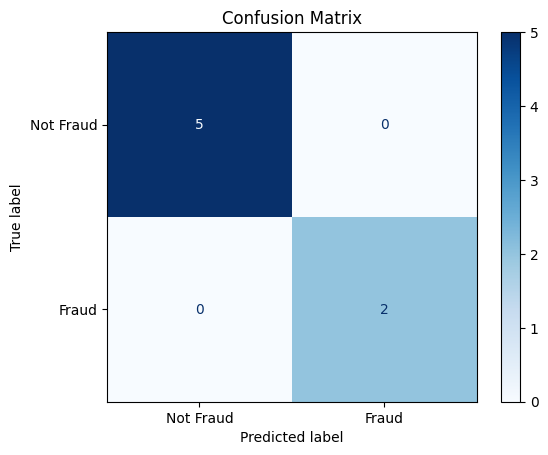


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [2]:
accuracy, conf_matrix, class_report = evaluate_model(ensemble_model, X_test, y_test)

# Display the results in a fancy way
print(f"\n{'*' * 40}\n{'Ensemble Model Evaluation':^40}\n{'*' * 40}")

# Display accuracy
print(f"\nAccuracy: {accuracy:.2%}")

# Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Fraud', 'Fraud'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Display Classification Report
print("\nClassification Report:")
print(class_report)
